In [1]:
import speech_recognition as sr
sr.__version__

'3.8.1'

In [2]:
import numpy as np
import os
train_dir='../audioData/train/'
valid_dir='../audioData/val/'
train_list_raw=os.listdir(train_dir)
valid_list_raw=os.listdir(valid_dir)
train_list=[]

for item in train_list_raw:
    if '.wav' in item:
        try:
            wave.open(train_dir+item)
        except Exception as ex:
            train_list.append(item)
valid_list=[]
for item in valid_list_raw:
    if '.wav' in item:
        try:
            wave.open(valid_dir+item)
        except Exception as ex:
            valid_list.append(item)

22951-4-027-w-28-041-hap-hap-hap.wav
(158760,)


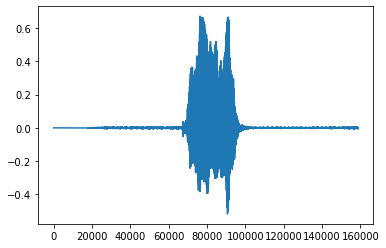

(1025, 311)


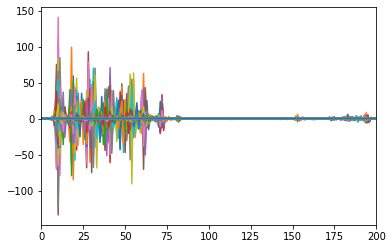

(128, 311)


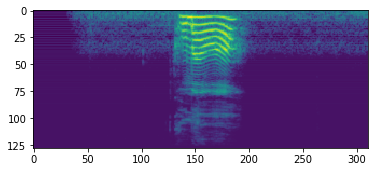

In [43]:
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd
%matplotlib inline
input_nfft=2048
input_stride=512
sample=train_list[1]
print(sample)
y,sr=librosa.load(train_dir+sample,sr=44100,mono=False)
y=librosa.to_mono(y)
print(y.shape)
plt.plot(y)
plt.show()
yS = np.abs(librosa.core.stft(y,n_fft=input_nfft, hop_length=input_stride))
ym=librosa.core.stft(y,n_fft=input_nfft, hop_length=input_stride)
print(ym.shape)
plt.plot(ym)
plt.xlim((0,200))
plt.show()
# print(yS.shape)
yS=librosa.feature.melspectrogram(S=librosa.amplitude_to_db(yS),sr=sr,n_mels=128,
                                 n_fft=input_nfft, hop_length=input_stride)
print(yS.shape)
yS=(yS-np.min(yS))/(np.max(yS)-np.min(yS))

plt.imshow(yS)
plt.show()

(1025, 10)


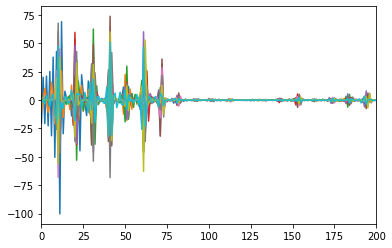

In [48]:
from scipy.io.wavfile import write
yP=y[75000:80000]
ym=librosa.core.stft(yP,n_fft=input_nfft, hop_length=input_stride)
print(ym.shape)
plt.plot(ym)
plt.xlim((0,200))
plt.show()

scaled = np.int16(yP/np.max(np.abs(yP)) * 32767)
write('test.wav', sr, scaled)
ipd.Audio("test.wav")